# WeatherPy
----

In [1]:
# Dependencies and Setup
import sys
sys.path.insert(0, 'C:/Users/Aaron/Documents')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
import gmaps

now = datetime.datetime.now()

# Import API key
from config import OW_api_key as key
from config import Gmaps_api_key as gkey
gmaps.configure(api_key=gkey)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
lat_lng_map = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        lat_lng_map.append(lat_lng)
# Print the city count to confirm sufficient count

len(cities)

604

In [3]:
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'}


cities_layer = gmaps.symbol_layer(
    lat_lng_map, fill_color='green', stroke_color='green', scale=2)
fig = gmaps.figure(center=(0,0), zoom_level=1)
fig.add_layer(cities_layer)
fig

Figure(layout=FigureLayout(height='420px'))

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={key}&units={units}&q="

# set up lists to hold reponse info
lat = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
city_name = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()

    try:
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        city_name.append(response['name'])
        
        print(f"Processing record {cities.index(city)} for {city} with temp {temp[-1]}")
        
    except KeyError:
        print("Missing field/result, skipping")


Processing record 0 for tiznit with temp 54.32
Processing record 1 for methoni with temp 63.82
Processing record 2 for pisco with temp 67.96
Processing record 3 for hovd with temp 46.04
Processing record 4 for bandarbeyla with temp 80.71
Processing record 5 for bethel with temp 34.7
Processing record 6 for constitucion with temp 77.38
Processing record 7 for hermanus with temp 55.54
Processing record 8 for bluff with temp 75.88
Processing record 9 for preobrazheniye with temp 51.71
Processing record 10 for port elizabeth with temp 60.01
Processing record 11 for bara with temp 75.88
Processing record 12 for jamestown with temp 65.98
Processing record 13 for marrakesh with temp 57.2
Processing record 14 for dudinka with temp 24.8
Processing record 15 for port blair with temp 77
Processing record 16 for ushuaia with temp 57.2
Processing record 17 for clyde river with temp 30.2
Processing record 18 for rikitea with temp 70.38
Processing record 19 for qingdao with temp 51.8
Processing recor

Processing record 170 for gold coast with temp 73.04
Processing record 171 for las palmas with temp 76.77
Processing record 172 for poum with temp 50.32
Missing field/result, skipping
Processing record 174 for ust-nera with temp -6.94
Processing record 175 for dalby with temp 70.83
Processing record 176 for cayenne with temp 82.4
Processing record 177 for codrington with temp 68.63
Processing record 178 for mosjoen with temp 48.07
Processing record 179 for niksar with temp 49.05
Processing record 180 for qaanaaq with temp 22.82
Processing record 181 for salalah with temp 78.8
Processing record 182 for dingle with temp 80.83
Processing record 183 for praia with temp 77
Processing record 184 for torbay with temp 44.65
Processing record 185 for tigil with temp 21.94
Processing record 186 for karratha with temp 80.98
Processing record 187 for grindavik with temp 26.02
Processing record 188 for kirakira with temp 82.76
Missing field/result, skipping
Processing record 190 for chumphon with t

Processing record 338 for howard springs with temp 82.35
Processing record 339 for egvekinot with temp 11.52
Missing field/result, skipping
Processing record 341 for choszczno with temp 48.74
Processing record 342 for austin with temp 82.87
Processing record 343 for verkhnyaya inta with temp 23.9
Processing record 344 for morondava with temp 75.65
Processing record 345 for saskylakh with temp 4.35
Processing record 346 for tombouctou with temp 93.96
Missing field/result, skipping
Missing field/result, skipping
Processing record 349 for palm coast with temp 73.26
Processing record 350 for itaituba with temp 80.6
Processing record 351 for mahebourg with temp 71.83
Processing record 352 for olinda with temp 75.63
Processing record 353 for hounde with temp 79.43
Missing field/result, skipping
Processing record 355 for vestmannaeyjar with temp 30.72
Processing record 356 for marovoay with temp 78.8
Processing record 357 for ishigaki with temp 71.6
Processing record 358 for tessaoua with tem

Processing record 507 for vardo with temp 59.05
Processing record 508 for iqaluit with temp 33.35
Missing field/result, skipping
Processing record 510 for tapes with temp 57.92
Processing record 511 for shumskiy with temp 27.88
Processing record 512 for itoman with temp 73.8
Processing record 513 for tripoli with temp 63.77
Processing record 514 for ayagoz with temp 28.58
Processing record 515 for karasuk with temp 35.87
Processing record 516 for nachalovo with temp 39.07
Processing record 517 for mezen with temp 30.38
Processing record 518 for bugiri with temp 64.22
Processing record 519 for luganville with temp 82.4
Processing record 520 for lodja with temp 69.8
Processing record 521 for cedar city with temp 64.76
Processing record 522 for douglas with temp 45.37
Processing record 523 for ponte nova with temp 66.34
Processing record 524 for herat with temp 41.92
Processing record 525 for foumban with temp 67.3
Processing record 526 for kalianget with temp 79.99
Processing record 527 

In [5]:
print(len(temp))
print(len(lat))
print(len(humidity))
print(len(cloudiness))
print(len(wind_speed))

543
543
543
543
543


In [6]:
weather_df = pd.DataFrame(list(zip(city_name, lat, temp, humidity, cloudiness, wind_speed)),
                          columns =['City Name', 'Latitude', 'Temperature (F)', 'Humidity', 'Cloudiness', 'Wind Speed (mph)'])
weather_df

,City Name,Latitude,Temperature (F),Humidity,Cloudiness,Wind Speed (mph)
0,Tiznit,29.70,54.32,42,0,2.17
1,Methoni,36.82,63.82,76,0,4.70
2,Pisco,-13.71,67.96,30,62,19.46
3,Hovd,63.83,46.04,93,75,5.82
4,Bandarbeyla,9.49,80.71,68,100,4.25
5,Bethel,60.79,34.70,86,90,19.46
6,Constitucion,23.99,77.38,34,75,5.82
7,Hermanus,-34.42,55.54,86,100,13.69
8,Bluff,-23.58,75.88,44,13,12.97
9,Preobrazheniye,42.90,51.71,46,100,9.15


In [7]:
weather_df.to_csv("weather_data.csv", encoding="utf-8", index=False)

#### Latitude vs. Temperature Plot

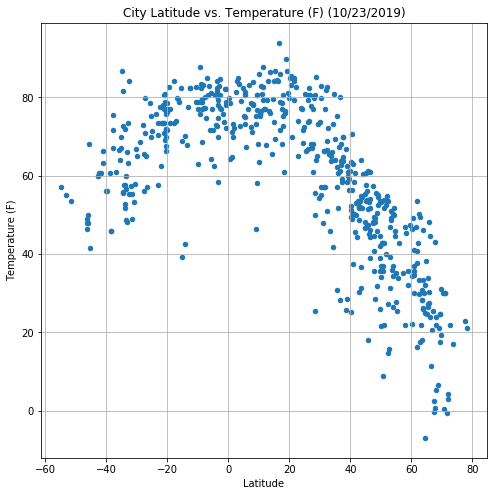

In [8]:
temp_plot = weather_df.plot(kind="scatter", x="Latitude", y="Temperature (F)", grid=True, figsize=(8,8),
              title=f"City Latitude vs. Temperature (F) ({now.strftime('%m/%d/%Y')})")

plt.savefig("City_Latitude_v_Temperature.png")

plt.show()

#### Latitude vs. Humidity Plot

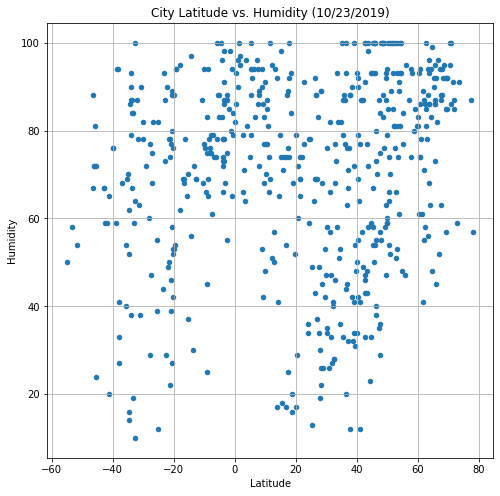

In [9]:
humidity_plot = weather_df.plot(kind="scatter", x="Latitude", y="Humidity", grid=True, figsize=(8,8),
              title=f"City Latitude vs. Humidity ({now.strftime('%m/%d/%Y')})")

plt.savefig("City_Latitude_v_Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

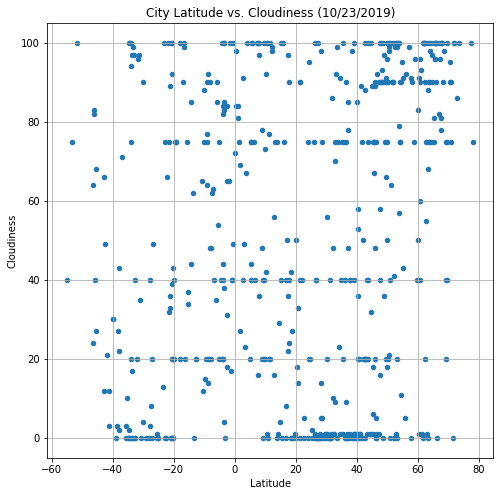

In [10]:
cloudiness_plot = weather_df.plot(kind="scatter", x="Latitude", y="Cloudiness", grid=True, figsize=(8,8),
              title=f"City Latitude vs. Cloudiness ({now.strftime('%m/%d/%Y')})")

plt.savefig("City_Latitude_v_Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

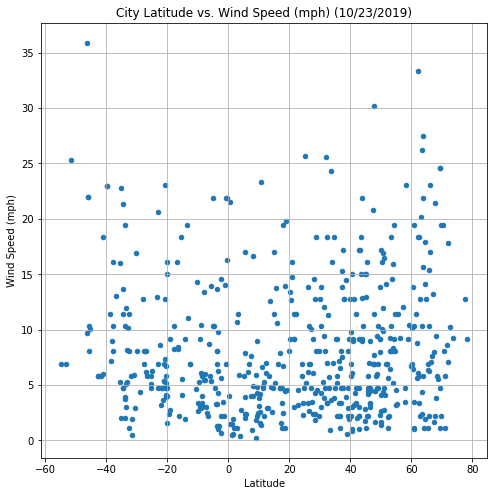

In [11]:
wind_plot = weather_df.plot(kind="scatter", x="Latitude", y="Wind Speed (mph)", grid=True, figsize=(8,8),
              title=f"City Latitude vs. Wind Speed (mph) ({now.strftime('%m/%d/%Y')})")

plt.savefig("City_Latitude_v_Wind Speed.png")

plt.show()

Observations:
    
1. As expected temperatures do increase as you get closer to the equator, however they drop off much faster in the positive latitudes versus the negative latititudes.

2. Locations in the northern hemisphere have higher humidity than locations in the southern hemisphere. These higher levels of humidity are likely due to the lower temperatures. (Ref: https://sciencing.com/temperature-ampamp-humidity-related-7245642.html)

3. There is significantly less land mass in the southern hemisphere which in turn causes there to be more datapoints in for cities in the northern hemisphere scewing the data. That being said it appears from the plot of cloudiness that there is a fairly even spread between both northern and southern hemispheres with no real massing or thinning of clouds near the equator. 